Accuracy: 0.80
Precision: 1.00
Recall: 0.75
F1 Score: 0.86


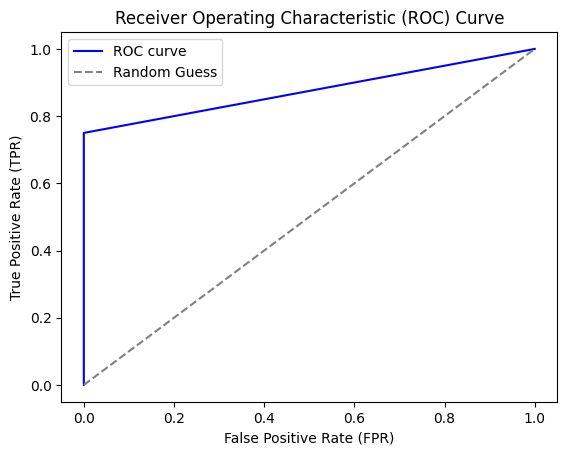

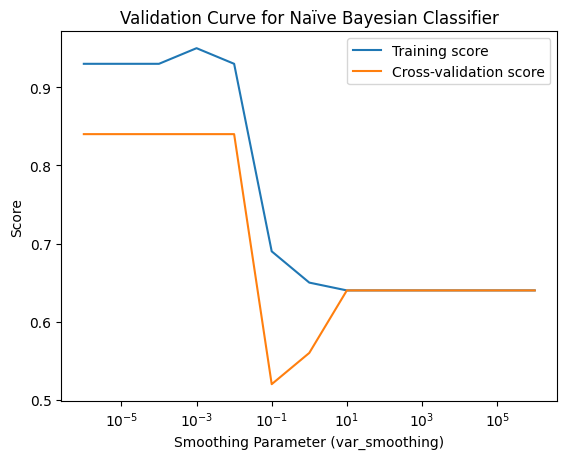

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import numpy as np

# Load the dataset from the CSV file
file_path = "covid.csv" # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Convert categorical data to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['pc', 'wbc', 'mc', 'ast', 'bc', 'ldh'])

# Split the dataset into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naïve Bayesian classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, F1 score, and ROC curve
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Plot ROC curve
# plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# Draw validation curves
param_range = np.logspace(-6, 6, 13)
train_scores, test_scores = validation_curve(GaussianNB(), X, y, param_name="var_smoothing", param_range=param_range, cv=5)

# plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores,axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores,axis=1), label='Cross-validation score')
plt.xscale('log')
plt.title('Validation Curve for Naïve Bayesian Classifier')
plt.xlabel('Smoothing Parameter (var_smoothing)')
plt.ylabel('Score')
plt.legend()
plt.show()